a solution for: https://www.kaggle.com/competitions/nlp-getting-started/overview

In [224]:
from pandas import read_csv , DataFrame
from numpy import array
from matplotlib.pyplot import plot , xlabel , ylabel , title , show
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score
encoder = Tokenizer(oov_token='<00U00>')

In [225]:
path_tr = "D:\\datasets\\nlp-getting-started\\train.csv"
path_ts = "D:\\datasets\\nlp-getting-started\\test.csv"
path_sub = "D:\\datasets\\nlp-getting-started\\sample_submission.csv"
file_tr = read_csv(path_tr)
file_ts = read_csv(path_ts)
file_sub = read_csv(path_sub)
file_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [226]:
file_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [227]:
file_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [228]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [229]:
lbl = file_tr.target
lbl_test = file_sub.target
texts = file_tr.text
test_texts = file_ts.text

In [230]:
mxlen = int(input('Maxlen :'))
encoder.fit_on_texts(texts)
sequences = encoder.texts_to_sequences(texts)
matrix_train = pad_sequences(sequences,padding='post',truncating='post',maxlen=mxlen)

Maxlen :16


In [231]:
matrix_train.shape

(7613, 16)

In [232]:
def Create_model()->None:
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(encoder.word_index)+1,2,input_length=mxlen),
                               layers.Flatten(),
                               layers.Dense(1,activation='relu')])
    model.compile(optimizer='rmsprop',
                  loss='Huber',
                  metrics=['accuracy'])
    return model

In [233]:
class Stop_it(Callback) :
    def on_epoch_end(self,epoch,log={}) :
        if (log.get('accuracy')>0.985) :
            print(f'\nAcuuracy is greater than 98.5%, so cancelling training...')
            self.model.stop_training = True

In [234]:
call = Stop_it()
history = Create_model().fit(matrix_train,lbl,epochs=100,callbacks=call)

Epoch 1/100
238/238 [==============================] - 0s 858us/step - loss: 0.1483 - accuracy: 0.5857
Epoch 2/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.7203
Epoch 3/100
238/238 [==============================] - 0s 919us/step - loss: 0.0768 - accuracy: 0.7993
Epoch 4/100
238/238 [==============================] - 0s 850us/step - loss: 0.0645 - accuracy: 0.8359
Epoch 5/100
238/238 [==============================] - 0s 769us/step - loss: 0.0561 - accuracy: 0.8598
Epoch 6/100
238/238 [==============================] - 0s 799us/step - loss: 0.0496 - accuracy: 0.8784
Epoch 7/100
238/238 [==============================] - 0s 837us/step - loss: 0.0443 - accuracy: 0.8907
Epoch 8/100
238/238 [==============================] - 0s 827us/step - loss: 0.0398 - accuracy: 0.9033
Epoch 9/100
238/238 [==============================] - 0s 844us/step - loss: 0.0358 - accuracy: 0.9134
Epoch 10/100
238/238 [==============================] - 0s 836us/step - los

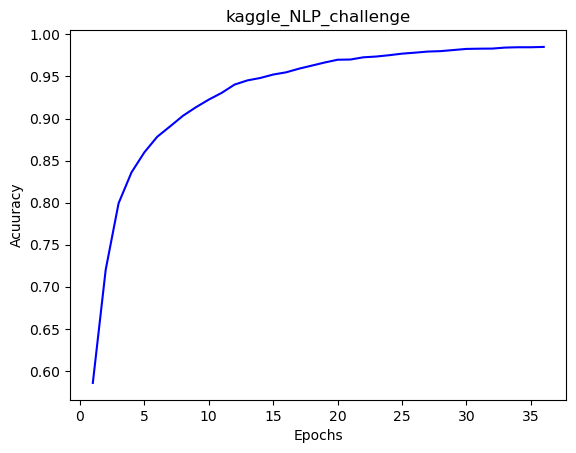

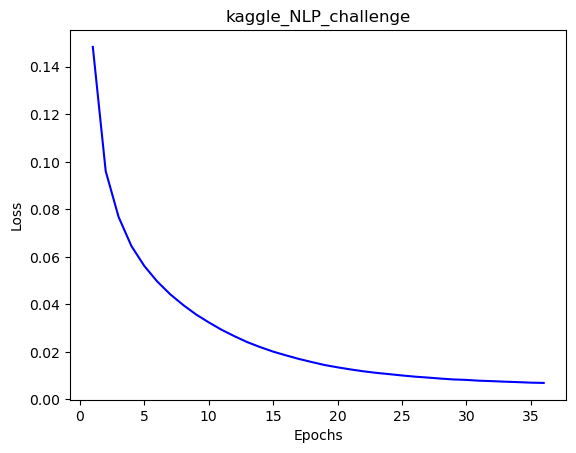

In [235]:
result = history.history
x = range(1,len(history.epoch)+1)
y = result['accuracy']
plot(x,y,'blue')
xlabel('Epochs')
ylabel('Acuuracy')
title('kaggle_NLP_challenge')
show()
#Visualize models performance on loss.
x = range(1,len(history.epoch)+1)
y = result['loss']
plot(x,y,'blue')
xlabel('Epochs')
ylabel('Loss')
title('kaggle_NLP_challenge')
show()

In [236]:
def Prepare_test(test_data):
    export = list()
    for note in test_data :
        temp = []
        for word in note.split() :
            if word in encoder.word_index.keys() :
                temp.append(encoder.word_index[word])
        mtrx = pad_sequences([temp],padding='post',truncating='post',maxlen=16).tolist()
        export.append(mtrx)
    return export

In [237]:
test_matrix = array(Prepare_test(test_texts))
finall_test = test_matrix.reshape(len(test_texts),mxlen)
finall_test.shape

(3263, 16)

In [238]:
preds = Create_model().predict(finall_test)

102/102 [==============================] - 0s 677us/step


In [239]:
preds_class = list()
for i in preds :
    if i[0]>=0.5 :
        preds_class.append(1)
    else :
        preds_class.append(0)

In [240]:
accuracy_score(lbl_test.to_list(),preds_class)*100

100.0

In [241]:
ID = file_sub.id.to_list()
preds_df = DataFrame([(ID[i],preds_class[i]) for i in range(len(preds_class))],columns=['id','target'])

In [242]:
preds_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [244]:
export_path = input('Enter export path:')
preds_df.to_csv(export_path,index=False)

Enter export path:D:\\datasets\\nlp-getting-started\\Result.csv
